In [1]:
!jupyter kernelspec list --json

{
  "kernelspecs": {
    "python3": {
      "resource_dir": "C:\\Users\\Shubham\\Anaconda3\\share\\jupyter\\kernels\\python3",
      "spec": {
        "argv": [
          "C:/Users/Shubham/Anaconda3\\python.exe",
          "-m",
          "ipykernel_launcher",
          "-f",
          "{connection_file}"
        ],
        "env": {},
        "display_name": "Python 3",
        "language": "python",
        "interrupt_mode": "signal",
        "metadata": {}
      }
    }
  }
}


## Importing Libraries :

In [39]:
import numpy as np 
import pandas as pd
import re
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from wordcloud import *
import PIL
import plotly.express as px
import statsmodels.api as sm
from scipy.stats import normaltest
from warnings import filterwarnings

In [40]:
import nltk
from collections import Counter 
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 

## Loading & Exploring the Data :

In [41]:
data = pd.read_csv("vaccination_tweets.csv")

In [42]:
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [43]:
data.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,3.302000e+03,3.302000e+03,3302.000000,3302.000000,3302.000000,3302.000000
mean,1.343403e+18,5.140656e+04,1157.452453,14275.658995,1.678074,11.202907
std,3.567138e+15,4.190450e+05,2348.682087,43491.982723,12.039026,74.163525
min,1.337728e+18,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.340025e+18,1.142500e+02,165.000000,377.250000,0.000000,0.000000
50%,1.343277e+18,5.085000e+02,459.500000,1770.000000,0.000000,1.000000
75%,1.346864e+18,2.384500e+03,1197.000000,10307.000000,1.000000,5.000000
max,1.349257e+18,1.371493e+07,64441.000000,924667.000000,446.000000,2129.000000


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3302 entries, 0 to 3301
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                3302 non-null   int64 
 1   user_name         3302 non-null   object
 2   user_location     2603 non-null   object
 3   user_description  3095 non-null   object
 4   user_created      3302 non-null   object
 5   user_followers    3302 non-null   int64 
 6   user_friends      3302 non-null   int64 
 7   user_favourites   3302 non-null   int64 
 8   user_verified     3302 non-null   bool  
 9   date              3302 non-null   object
 10  text              3302 non-null   object
 11  hashtags          2442 non-null   object
 12  source            3301 non-null   object
 13  retweets          3302 non-null   int64 
 14  favorites         3302 non-null   int64 
 15  is_retweet        3302 non-null   bool  
dtypes: bool(2), int64(6), object(8)
memory usage: 367.7+ KB


In [45]:
data.shape

(3302, 16)

In [46]:
data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of          id  user_name  user_location  user_description  user_created  \
0     False      False          False             False         False   
1     False      False          False             False         False   
2     False      False          False             False         False   
3     False      False          False             False         False   
4     False      False           True             False         False   
...     ...        ...            ...               ...           ...   
3297  False      False          False             False         False   
3298  False      False          False             False         False   
3299  False      False           True             False         False   
3300  False      False          False             False         False   
3301  False      False          False             False         False   

      user_followers  user_friends  user_favourites  user_ver

C:\Users\Shubham\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



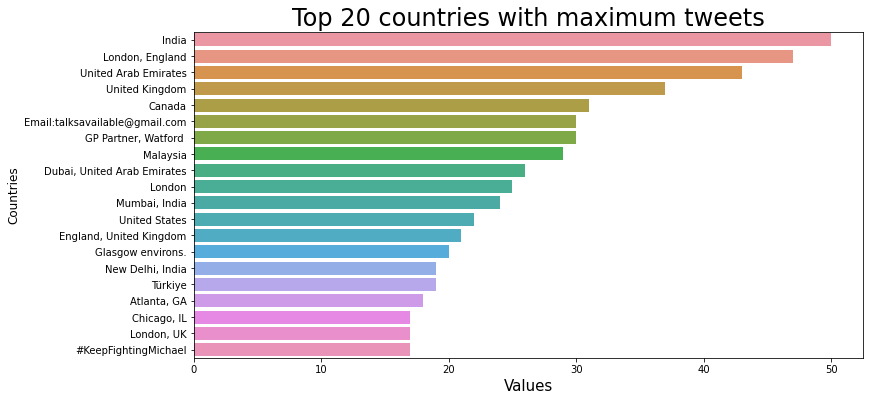

In [47]:
user_location = data.user_location.value_counts().head(20)
user_location
#ret = data.ret
plt.figure(figsize=(12,6))
sns.barplot(user_location.values, user_location.index)
plt.title('Top 20 countries with maximum tweets',fontsize=24)
plt.xlabel('Values', fontsize=15)
plt.ylabel('Countries', fontsize=12)
plt.show()

<AxesSubplot:>

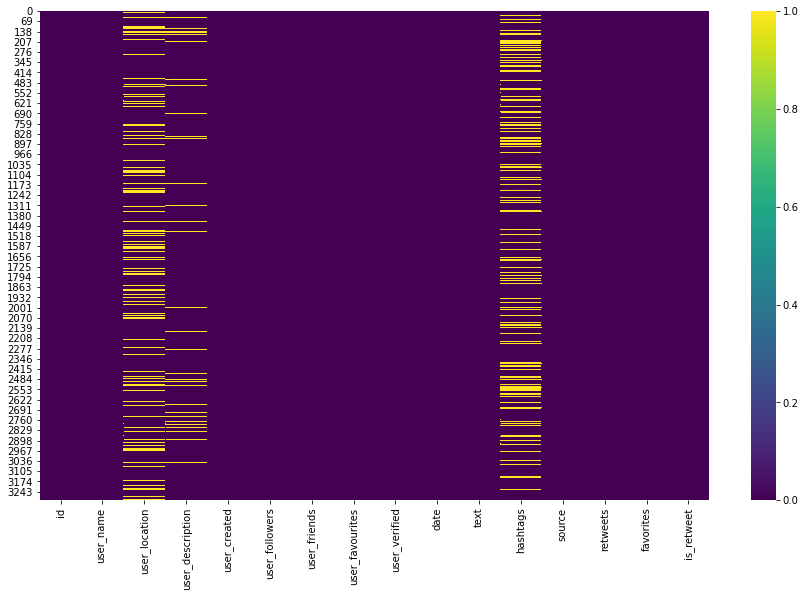

In [48]:
plt.figure(figsize=(15,9))
sns.heatmap(data.isnull(), cmap='viridis')

A lot of the information about the **location of the users** and the **hashtags used for the tweets** is missing. So it will be a little difficult to analyze the sentiments of the Tweets based on the location of the user.

\
Let us explore other features of the Tweets.




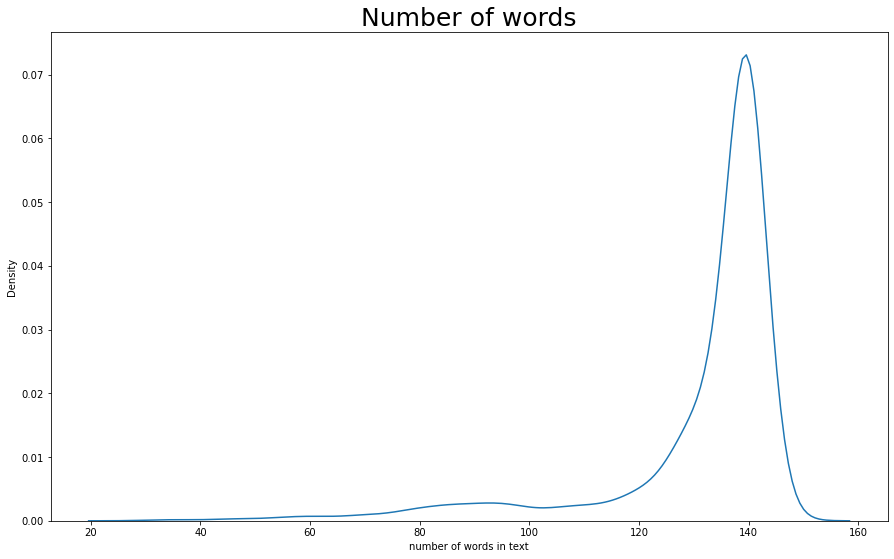

In [49]:
data['number of words in text'] = data['text'].apply(lambda x: len(x))
plt.figure(figsize=(15,9))
sns.kdeplot(data['number of words in text'])
plt.title('Number of words', fontsize=25)
plt.show()

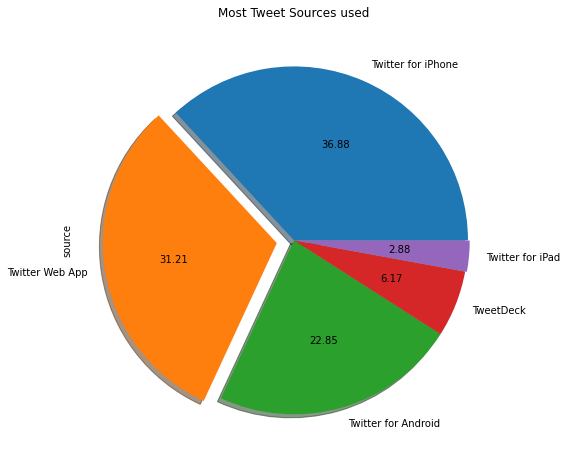

In [50]:
info = data['source'].value_counts().sort_values(ascending=False)
explode = (0, 0.1, 0, 0,0.01) 
plt.figure(figsize=(8,8))
info[0:5].plot(kind = 'pie', title = 'Most Tweet Sources used', autopct='%.2f' , shadow=True, explode = explode)
plt.show()

#### The Pie chart shows the most popular platforms or sources for the Tweets.

### The Objective of the project is to analyze the sentiments of the tweets. So let us extract the text from the tweets.

In [51]:
tweets = data["text"]

In [52]:
text=data[["text"]].to_string()

In [53]:
import string

In [54]:
punct =string.punctuation
punct

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [55]:
stop_words = set(stopwords.words('english')) 

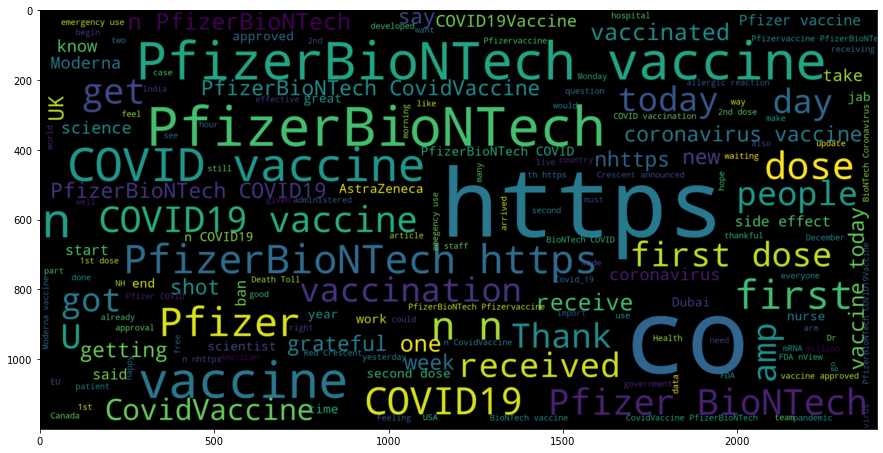

In [56]:
plt.figure(figsize=(15,10))
wordcloud = WordCloud(stopwords=stop_words, scale=6, max_font_size=50, max_words=500,background_color="black").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.show()

From the WordCloud image we can see that **https** is the most used word in the entire collection of Tweets, which implies that a large portion of the Tweets were used to share web-links or web-pages.

#### Filter out punctuation and the stopwords from the text :

In [57]:
word_tokens = word_tokenize(text) 
filtered_sentence = [w for w in word_tokens if not w in stop_words] 
filtered_sentence = [] 


for w in word_tokens:
    if w not in punct:
        if w not in stop_words: 
            filtered_sentence.append(w)

In [58]:
filtered_sentence

['text',
 '0',
 'Same',
 'folks',
 'said',
 'daikon',
 'paste',
 'could',
 'treat',
 'cytokine',
 'storm',
 'PfizerBioNTech',
 'https',
 '//t.co/xeHhIMg1kF',
 '1',
 'While',
 'world',
 'wrong',
 'side',
 'history',
 'year',
 'hopefully',
 'biggest',
 'vaccination',
 'effort',
 "'ve",
 'ev…',
 'https',
 '//t.co/dlCHrZjkhm',
 '2',
 'coronavirus',
 'SputnikV',
 'AstraZeneca',
 'PfizerBioNTech',
 'Moderna',
 'Covid_19',
 'Russian',
 'vaccine',
 'created',
 'last',
 '2-4',
 'years…',
 'https',
 '//t.co/ieYlCKBr8P',
 '3',
 'Facts',
 'immutable',
 'Senator',
 'even',
 "'re",
 'ethically',
 'sturdy',
 'enough',
 'acknowledge',
 '1',
 'You',
 'born',
 'i…',
 'https',
 '//t.co/jqgV18kch4',
 '4',
 'Explain',
 'need',
 'vaccine',
 'BorisJohnson',
 'MattHancock',
 'whereareallthesickpeople',
 'PfizerBioNTech…',
 'https',
 '//t.co/KxbSRoBEHq',
 '5',
 'Does',
 'anyone',
 'useful',
 'advice/guidance',
 'whether',
 'COVID',
 'vaccine',
 'safe',
 'whilst',
 'breastfeeding',
 '…',
 'https',
 '//t.co/Eifs

In [59]:
def listToString(s):
    str1 = " "  
    return (str1.join(s))        
        
print(listToString(filtered_sentence)) 

text 0 Same folks said daikon paste could treat cytokine storm PfizerBioNTech https //t.co/xeHhIMg1kF 1 While world wrong side history year hopefully biggest vaccination effort 've ev… https //t.co/dlCHrZjkhm 2 coronavirus SputnikV AstraZeneca PfizerBioNTech Moderna Covid_19 Russian vaccine created last 2-4 years… https //t.co/ieYlCKBr8P 3 Facts immutable Senator even 're ethically sturdy enough acknowledge 1 You born i… https //t.co/jqgV18kch4 4 Explain need vaccine BorisJohnson MattHancock whereareallthesickpeople PfizerBioNTech… https //t.co/KxbSRoBEHq 5 Does anyone useful advice/guidance whether COVID vaccine safe whilst breastfeeding … https //t.co/EifsyQoeKN 6 bit sad claim fame success vaccination patriotic competition USA Canada UK and… https //t.co/IfMrAyGyTP 7 There many bright days 2020 best \n1 BidenHarris winning Election2020… https //t.co/77u4f8XXfx 8 Covid vaccine You getting \n\n CovidVaccine covid19 PfizerBioNTech Moderna 9 CovidVaccine \n\nStates start getting COVID19

In [60]:
split_it =listToString(filtered_sentence).split()

In [61]:
Counter = Counter(split_it)

#### The 100 most frequent words :

In [62]:
most_occur = Counter.most_common(120)
frequentwords=pd.DataFrame(most_occur).rename(columns={0:"Words",1:"Frequencies"})
frequentwords

,Words,Frequencies
0,https,3151
1,PfizerBioNTech,1520
2,vaccine,1237
3,I,549
4,’,421
...,...,...
115,yesterday,39
116,Dose,39
117,done,39
118,article,38


#### Gettig Words Roots :

In [63]:
from nltk.stem.snowball import SnowballStemmer
s_stemmer = SnowballStemmer(language='english')

stem = []
for word in Counter:
    stem.append(s_stemmer.stem(word))

In [64]:
import spacy
nlp = spacy.load('en_core_web_lg')

In [65]:
stem2 = []
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)

In [66]:
df = pd.DataFrame(stem2)
df = df[0].value_counts()

In [67]:
df = df[:20,]
px.bar(df, x=df.values,y= df.index, color=df.index, height=500)

In [68]:
features=tweets.values
features

array(['Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech https://t.co/xeHhIMg1kF',
       "While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort we've ev… https://t.co/dlCHrZjkhm",
       '#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… https://t.co/ieYlCKBr8P',
       ...,
       '@TurnbullWhitby  guess who got their 1st vaccine today of the #PfizerBioNTech \n\nSo far so good! No side effects!',
       'WHO recommends 2 doses of Pfizer-BioNTech COVID-19 vaccine within 21-28 days https://t.co/IGhW3IpH3k… https://t.co/plWB59ea59',
       "Most welcome news out of #Bogota: @IvanDuque announces the country's medicine agency granted emergency use to the… https://t.co/NmQbxBijci"],
      dtype=object)

In [69]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the Http: urls
    processed_feature = re.sub('(https?://\S+)', '', str(features[sentence]))
    
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', processed_feature)

    # Remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

### Adding Subjectivity & Polarity :

In [70]:
df1=pd.DataFrame()
df1['Tweets']=processed_features

In [71]:
from textblob import TextBlob

In [74]:
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

def getPolarity(text):
   return  TextBlob(text).sentiment.polarity

df1['Subjectivity'] = df1['Tweets'].apply(getSubjectivity)
df1['Polarity'] = df1['Tweets'].apply(getPolarity)

In [75]:
df1.head()

,Tweets,Subjectivity,Polarity
0,same folks said daikon paste could treat cytok...,0.125000,0.00
1,while the world has been on the wrong side of ...,0.900000,-0.50
2,coronavirus sputnikv astrazeneca pfizerbionte...,0.033333,0.00
3,facts are immutable senator even when you re n...,0.550000,-0.05
4,explain to me again why we need vaccine borisj...,0.000000,0.00


### Creating Sentiment Analysis :

In [76]:
def getAnalysis(score):
 if score < 0:
  return 'Negative'
 elif score == 0:
  return 'Neutral'
 else:
  return 'Positive'
df1['Analysis'] = df1['Polarity'].apply(getAnalysis)
df1

,Tweets,Subjectivity,Polarity,Analysis
0,same folks said daikon paste could treat cytok...,0.125000,0.00,Neutral
1,while the world has been on the wrong side of ...,0.900000,-0.50,Negative
2,coronavirus sputnikv astrazeneca pfizerbionte...,0.033333,0.00,Neutral
3,facts are immutable senator even when you re n...,0.550000,-0.05,Negative
4,explain to me again why we need vaccine borisj...,0.000000,0.00,Neutral
...,...,...,...,...
3297,i did it all the silver lining to shit tastic ...,0.800000,-0.20,Negative
3298,vaccine update 12 hours after the second dose ...,0.150000,0.05,Positive
3299,turnbullwhitby guess who got their 1st vaccin...,0.800000,0.40,Positive
3300,who recommends 2 doses of pfizer biontech covi...,0.000000,0.00,Neutral


<AxesSubplot:xlabel='Analysis', ylabel='count'>

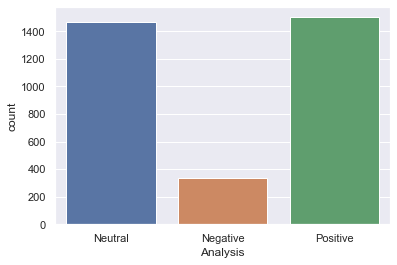

In [93]:
sns.countplot(x='Analysis',data=df1)

## Conclusions :
1. A vast majority of the Tweets are of either **Positive** or **Neutral** sentiment. This shows us an intrinsic tendency of Hope in Humans.
2. Apart from transmitting their feelings, people also use Twitter to share information in the form of links.
3. A vast majority of Tweets are long , namely, more than 100 characters.
4. Apple iOS is the single most popular platform for Twitter.